# Analysis the Iris Dataset
*by Neil Tynan @ATU*

![Iris](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Iris_latifolia-Lac_Aule-Laruns-2522~2013_07_29.JPG/1080px-Iris_latifolia-Lac_Aule-Laruns-2522~2013_07_29.JPG)

*“Image credit: Wikimedia user Clocks, CC BY-SA 3.0, https://creativecommons.org/licenses/by-sa/3.0/”*

## Import Libraries and Data
---

First off we need to load in the libraries and the Iris dataset.

In [58]:
# Load in libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [59]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 

In [60]:
# data (as pandas dataframes) 
X = iris.data.features
y = iris.data.targets 

## Preparing the Dataset for Analysis
---

Next we need to cleanup the Iris datset that we've imported so that it's easier to analyse.

In [61]:
# Converting the original dataset in a pandas dataframe
z = iris.data.original
df = pd.DataFrame(z)

# Saving the Iris dataframe into the directory
df.to_csv("/workspaces/pands-project/data.csv")

# Saving a description of the Iris variables into the directory as a text file
text = df.describe().T
text.index.name = 'variable'
text1 =text.round(1)
text1.to_csv("/workspaces/pands-project/iris_variables_description.txt")

# Adjusting dataframe for readibility on graphs
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
df['species'] = df['species'].replace({'Iris-setosa': 'Setosa', 'Iris-versicolor':'Versicolor', 'Iris-virginica': 'Virginica'}, regex=True)



## Histograms
---

Our first step in lookingat the data is to get an idea of how each variable is distributed. We're going to use histograms for this. We'll start off by looking at each variable in it's totality. We'll make sure to save the results for all of these histograms, as part of the third requirment for this project.

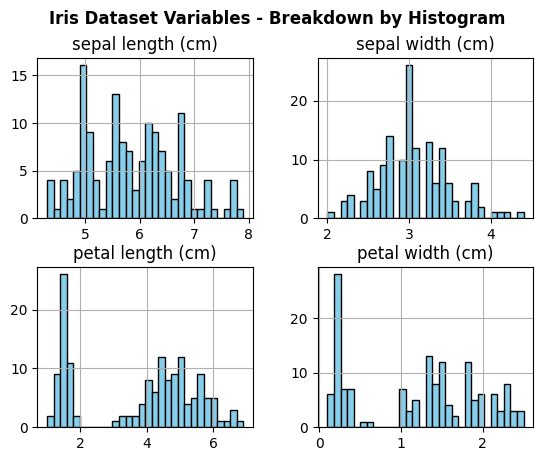

In [62]:
# Generating a histogram of the Iris dataset
df.hist(bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Iris Dataset Variables - Breakdown by Histogram', fontweight="bold")

# Saving the histogram into the directory
plt.savefig('iris_histogram.png')

The two petal variables look relatively similar in terms of their distributions but there's quite a bit more variables between sepal width and length. Perhaps this is just the influence of the various species of Iris' in the dataset? Let's break the histogram's down so that they also include a breakdown by species.

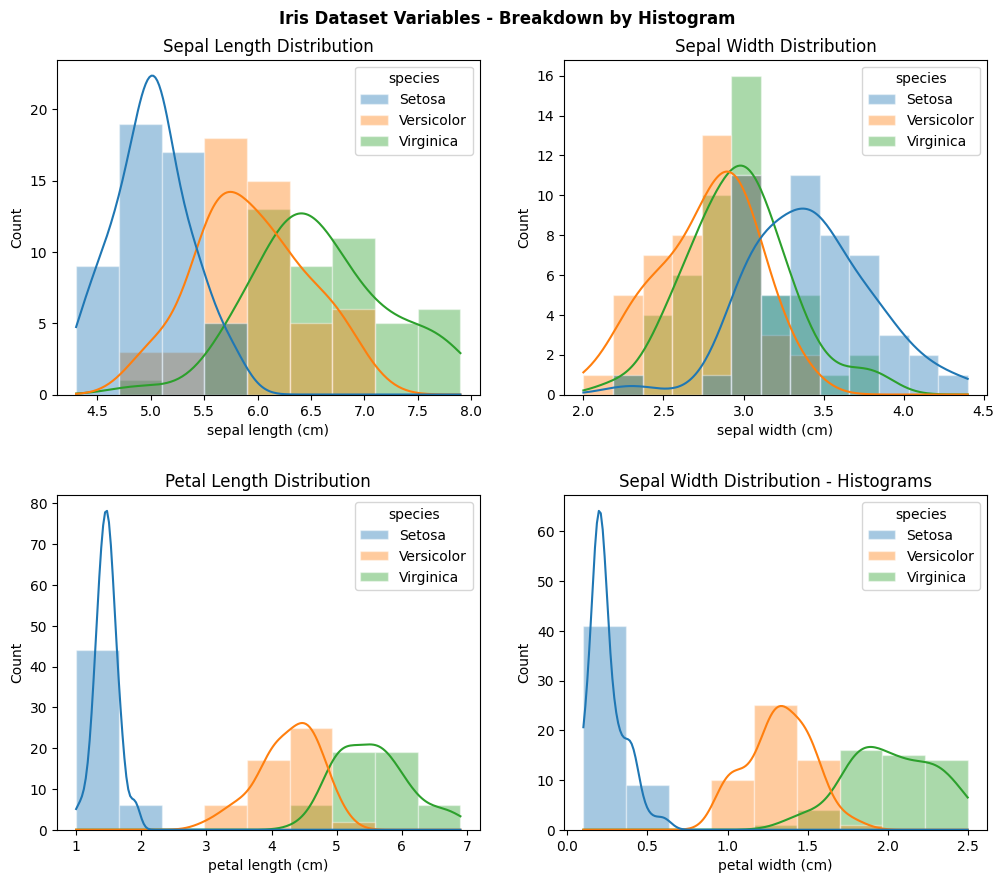

In [63]:
# Generating a histogram of the Iris dataset which includes a breakdown
fig, axes = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'hspace': 0.3})
sns.histplot(df, x="sepal length (cm)", hue="species", kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[0, 0]) 
axes[0, 0].set_title('Sepal Length Distribution')
sns.histplot(df, x="sepal width (cm)", hue="species", kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width Distribution')
sns.histplot(df, x="petal length (cm)",hue="species", kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[1, 0])
axes[1, 0].set_title('Petal Length Distribution')
sns.histplot(df, x="petal width (cm)", hue="species", kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[1, 1])
axes[1, 1].set_title('Sepal Width Distribution - Histograms')
plt.suptitle('Iris Dataset Variables - Breakdown by Histogram', fontweight="bold", y=0.93)

# Saving the histogram into the directory
plt.savefig('iris_histogram_species.png')

Interestingly, the divide is still here. When broken down by species, the distribution of the sepals' variables seems even more haphazard while each of the species has a clear alignment between the distribution of the petal variables.

## Scatter Plots
---

The next part of this analysis involves looking at how both pairs of variables (petals/sepals) line up with one another. For this, we will be using a scatter chart to look at the clustering of both pairs.

Text(0.5, 1, 'Iris Dataset Variables - Breakdown by Scatterchart')

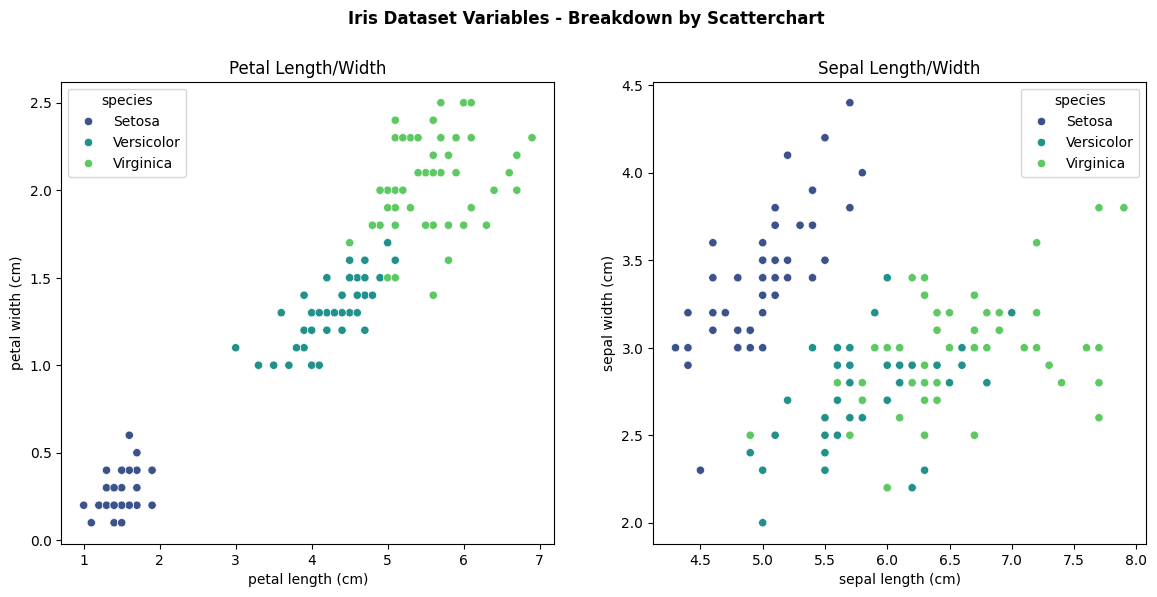

In [64]:
# create scatter plot of the petal variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax = sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', color='steelblue', hue='species', palette= 'viridis', ax=axes[0])
axes[0].set_title('Petal Length/Width')
ax = sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', color='steelblue', hue='species', palette= 'viridis', ax=axes[1])
axes[1].set_title('Sepal Length/Width')
plt.suptitle('Iris Dataset Variables - Breakdown by Scatterchart', fontweight="bold", y=1)

In addition to these charts, it might also be useful to look at both sepals and petals on the same chart to see how they line up against one another.

Text(0.5, 1.0, 'Length/Width of Sepals vs Petals')

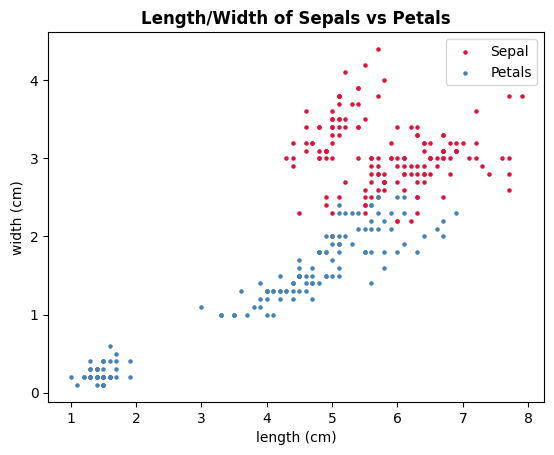

In [66]:
#create scatter plot of both pairs of variables
ax1=df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='crimson', label='Sepal', marker = ".")
ax2=df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='steelblue', label='Petals', marker = ".", ax=ax1)
ax1.set_xlabel('length (cm)')
ax1.set_ylabel('width (cm)')
ax1.set_title("Length/Width of Sepals vs Petals", fontweight="bold")

The two variables clearly occupy very distinct places in the chart and putting them next to each other further highlights how different the two are in terms of correlation.

## Heatmap Correlation Analysis
---

Finally, it might be useful to look at how all the different variables correlate to one another. For this, we're going to use a heatmap. A heatmap represents the magnitude of individual values within a dataset as a color or a number. The light the number or the closer the number is to a one, the more correlated the two variables are.

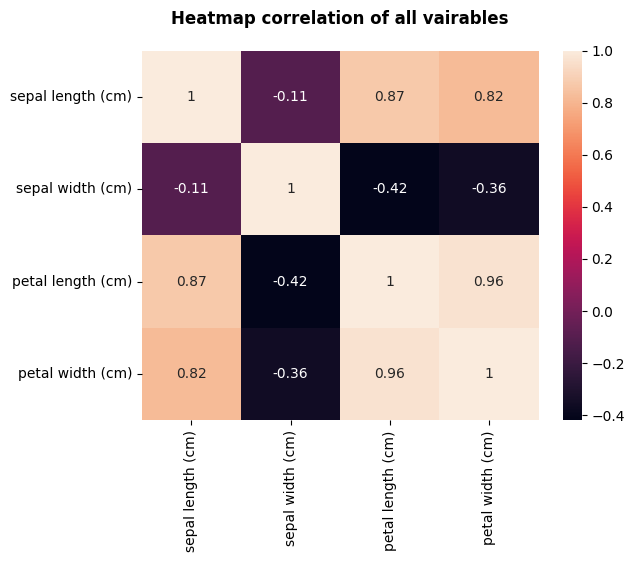

In [70]:
# create a box plot of the variables

ax = sns.heatmap((df.select_dtypes(include=['number']).corr(method='pearson')), annot = True); 
ax.set_title("Heatmap correlation of all vairables", fontweight="bold", y=1.05)
plt.show()

What we see here largely lines up with what we have seen in the scatter charts but is suprising in some other regards. Petal length and petal wid are strongly correlated but it is not so for sepal width and sepal length. However, what is interesting is that the length and width of an Iris' petals seems to be a better indicator of their sepals width than the length of the sepal itself.